This tutorial shows how we test the influence of different drivers on climate induced trends in damages.The same input file as in the tutorial on attribution is required.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import itertools
import pymannkendall as mk
from scipy.stats import shapiro
import numpy.ma as ma
import matplotlib.pyplot as plt
import warnings
# read data
data = pd.read_csv('/home/insauer/projects/NC_Submission/Climada_papers/Test/DEMO_VulnerabilityTimeSeriesSubregions.csv')

In [3]:
# read normalised climate oscillation indices
osc = pd.read_csv('~/projects/NC_Submission/Climada_papers/climada_papers/202010_flood_attribution/Demo/Demo_Data/norm_oscillations_lag.csv')
osc

,Unnamed: 0,Year,AMO,ENSO,PDO,NAO,GMT,AMO_lag,ENSO_lag,PDO_lag,GMT_lag,NAO_lag
0,20,1971,1.139214,1.900735,1.174442,1.626966,1.135109,1.404047,1.621324,1.411453,1.484944,1.484944
1,21,1972,1.085889,1.198529,1.272386,1.896629,1.135109,1.139214,1.900735,1.174442,1.626966,1.626966
2,22,1973,1.259564,1.738971,1.303560,1.574831,1.422215,1.085889,1.198529,1.272386,1.896629,1.896629
3,23,1974,1.000000,1.897059,1.427592,1.719101,1.111075,1.259564,1.738971,1.303560,1.574831,1.574831
4,24,1975,1.153441,2.000000,1.224630,1.581573,1.224099,1.000000,1.897059,1.427592,1.719101,1.719101
5,25,1976,1.071030,1.551471,1.519124,1.722697,1.054563,1.153441,2.000000,1.224630,1.581573,1.581573
6,26,1977,1.291285,1.132353,1.578156,1.440449,1.408574,1.071030,1.551471,1.519124,1.722697,1.722697
7,27,1978,1.303193,1.382353,1.579483,1.792809,1.296850,1.291285,1.132353,1.578156,1.440449,1.440449
8,28,1979,1.390768,1.474265,1.605793,1.694382,1.391361,1.303193,1.382353,1.579483,1.792809,1.792809
9,29,1980,1.507008,1.382353,1.676763,1.399101,1.476453,1.390768,1.474265,1.605793,1.694382,1.694382


In [4]:
def looCV(clim, predic, fnc):
    """
    Wrapper function to select the best model. Function provides all possible
    combinations of predictors and a constant and evaluates the model applying
    the LooCV. It selects the model with the smallest out-of sample error.

    Parameters
    ----------
    clim : np.array
        damage time series
    predic : DataFrame
        oscillation indices and GMT
    fnc: link-function

    Returns
    -------
    float
        out-off-sample errors
    """
    err = 0
    for lo_index in range(len(clim)):

        clim_mask = np.ma.array(clim, mask=False)
        clim_mask.mask[lo_index] = True
        clim_lo = clim_mask.compressed()

        predic_lo = predic.reset_index().drop(lo_index, axis=0).drop('index', 1)

        model_res = sm.GLM(clim_lo, predic_lo,
                           family=sm.families.Gamma(fnc)).fit(maxiter=5000, scale=1.)

        value_pred = model_res.predict(predic).iloc[lo_index]

        err = err + (clim[lo_index] - value_pred)**2

    return err/len(clim)

In [5]:

def pred_double(comb):
    """
    Function checks whether combinations contain lagged and original climate oscillation
    Parameters
    ----------
    comb : np.array
        damage time series

    Returns
    -------
    bool
        True if both lagged and original climate oscillation are predictors
    """
    pred_names = ['GMT', 'ENSO', 'NAO', 'PDO']

    for p in pred_names:
        if p in comb:
            if p + '_lag' in comb:
                return True

    return False

In [6]:
def get_pearson(pred, climdat):
    """
    pearson correlation of model predicted data and damage time series

    Parameters
    ----------
    pred : GLM
        model
    climdat : np.array
        damage time series

    Returns
    -------
    float
        Pearson correlation coefficient

    """

    a = ma.masked_invalid(climdat)
    b = ma.masked_invalid(pred.predict())
    msk = (~a.mask & ~b.mask)
    corrcoef = ma.corrcoef(a[msk], b[msk])

    return corrcoef[0, 1]

In [7]:
def find_best_model(climateDat, predictors):
    """
    Wrapper function to select the best model. Function provides all possible
    combinations of predictors and a constant and evaluates the model applying
    the LooCV. It selects the model with the smallest out-of sample error.

    Parameters
    ----------
    climateDat : np.array
        damage time series
    predictors : DataFrame
        climate oscillations and GMT

    Returns
    -------
    best_model: GLMObject
        full GLM object of the best model
    pearson_corr: float
        pearson correlation of model and data
    best_loo: float
        out-of-sample-error of the best model
    looICs_lf: np.array
        all out-off-sample errors
    comb_list_lf:
    """

    max_i = 5000
    models_lf = []
    looICs_lf = []
    comb_list_lf = []
    # define link functions
    link_fnc_list = [sm.families.links.log(), sm.families.links.inverse_power()]
    for link_fnc in link_fnc_list:
        models = []
        looICs = []
        comb_list = []
        for n_preds in range(0, 5):
            for comb in list(itertools.combinations(predictors, n_preds)):
                # skip predictor combinations with lagged and original predictor
                if pred_double(comb):
                    continue
                data_exog = sm.add_constant(predictors[list(comb)])
                try:

                    model_result = sm.GLM(climateDat, data_exog,
                                          family=sm.families.Gamma(link_fnc)).fit(maxiter=max_i,
                                                                                  scale=1.)
                    looIC = looCV(climateDat, data_exog, link_fnc)
                    models.append(model_result)
                    looICs.append(looIC)
                    comb_list.append(comb)
                except ValueError:
                    models.append(sm.GLM(data_exog, np.ones(len(climateDat))))
                    looICs.append(1e10)
                    comb_list.append(comb)

        looICs_lf.append(looICs)
        models_lf.append(models)
        comb_list_lf.append(comb_list)

    best_model_indices = np.array(np.unravel_index(np.argmin(np.array(looICs_lf), axis=None),
                                                   np.array(looICs_lf).shape))

    best_model = models_lf[best_model_indices[0]][best_model_indices[1]]

    best_loo = looICs_lf[best_model_indices[0]][best_model_indices[1]]

    pearson_corr = get_pearson(best_model, climateDat)
    
    lnk_function = link_fnc_list[best_model_indices[0]]

    return best_model, lnk_function, pearson_corr, best_loo

In [8]:
def test_residuals(model):
    """
    Test for a residual trend, applying a Mann-Kendall-test

    Parameters
    ----------
    model : GLMObject
        Best model

    Returns
    -------
    float
        slope in residuals
    float
        p-value

    """
    res_trend = mk.original_test(model.resid_response, alpha=0.1)

    return res_trend.slope, res_trend.p

In [13]:
def extract_model_coefs(model, link, pred_data):
    """
    Reads the coefficients and p-values for each predictor of the best model
    and saves data in a csv file. To achieve comparability between coefficients of
    models with different link functions the partial devaritive in a centric
    development point is calculated.

    Parameters
    ----------
    model : GLMObject
        best model
    link : int
        index of link function
    """
    
    shortage = ''
    dev_index = 20
    predictors = ['ENSO', 'ENSO_lag', 'GMT', 'AMO', 'PDO', 'PDO_lag', 'NAO', 'NAO_lag']
    coeff_info = pd.DataFrame()
    coeff_info['Predictor']= predictors
    coeff_info['p-value'] = np.nan
    coeff_info['contribution'] = np.nan
    coeff_sum = 0
    for p, pred in enumerate(predictors):
        try:
            coeff_deriv = link.inverse_deriv(pred_data[pred])\
                * model.params[pred]
            coeff_info.loc[coeff_info['Predictor']==pred, 'contribution'] = np.array(coeff_deriv)[dev_index]
            coeff_info.loc[coeff_info['Predictor']==pred, 'p-value'] = model.pvalues[pred]
            coeff_sum+= np.abs(np.array(coeff_deriv)[dev_index])
        except KeyError:
            coeff_info.loc[coeff_info['Predictor']==pred, 'contribution'] = np.nan
            coeff_info.loc[coeff_info['Predictor']==pred, 'p-value'] = np.nan
    
    coeff_info['norm_contribution'] = coeff_info['contribution']/coeff_sum
    
    return coeff_info

In [10]:
# define function to ignore messages
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
# set climate oscillations as predictors 
predictors_amo = osc[['ENSO', 'ENSO_lag', 'AMO', 'PDO', 'PDO_lag', 'NAO', 'NAO_lag']]
# normalise climate driven damage time series
D_1980_Pos_norm = data['D_1980_Pos']/np.nanmax(data['D_1980_Pos'])
# find best model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    best_model_amo, link_fnc_amo, pearson_corr_amo, best_loo_amo = find_best_model(D_1980_Pos_norm, predictors_amo)    
print(best_model_amo.summary())
print('r:'+ str(pearson_corr_amo))
print('out-of-sample-error:'+ str(best_loo_amo))

                 Generalized Linear Model Regression Results                  
Dep. Variable:             D_1980_Pos   No. Observations:                   40
Model:                            GLM   Df Residuals:                       35
Model Family:                   Gamma   Df Model:                            4
Link Function:          inverse_power   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                 33.572
Date:                Tue, 17 Nov 2020   Deviance:                       10.185
Time:                        11:24:38   Pearson chi2:                     12.5
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1515     18.010      2.285      0.0

In [11]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
# set climate oscillations as predictors 
predictors_gmt = osc[['ENSO', 'ENSO_lag', 'GMT', 'PDO', 'PDO_lag', 'NAO', 'NAO_lag']]
# normalise climate driven damage time series
D_1980_Pos_norm = data['D_1980_Pos']/np.nanmax(data['D_1980_Pos'])
# find best model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    best_model_gmt, link_fnc_gmt, pearson_corr_gmt, best_loo_gmt = find_best_model(D_1980_Pos_norm, predictors_gmt)    
print(best_model_gmt.summary())
print('r:'+ str(pearson_corr_gmt))
print('out-of-sample-error:'+ str(best_loo_gmt))

                 Generalized Linear Model Regression Results                  
Dep. Variable:             D_1980_Pos   No. Observations:                   40
Model:                            GLM   Df Residuals:                       35
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                 32.071
Date:                Tue, 17 Nov 2020   Deviance:                       13.187
Time:                        11:25:00   Pearson chi2:                     13.1
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3964      3.054      0.457      0.6

In this example for both predictor sets, the best model contains all four predictors. The best model chosen from the set containing AMO performs better in tis example than the best model from the predictor set containing GMT , as the r is higher for the AMO example and the out-of-sample-error is lower.

In [17]:
coeff_info_amo = extract_model_coefs(best_model_amo, link_fnc_amo, predictors_amo)
coeff_info_amo = coeff_info_amo.dropna()
coeff_info_amo

,Predictor,p-value,contribution,norm_contribution
0,ENSO,0.121740,4.158854,0.338433
3,AMO,0.000418,5.767445,0.469335
5,PDO_lag,0.361252,1.513449,0.123159
7,NAO_lag,0.576763,0.848802,0.069073


In [18]:
coeff_info_gmt = extract_model_coefs(best_model_gmt, link_fnc_gmt, predictors_gmt)
coeff_info_gmt = coeff_info_gmt.dropna()
coeff_info_gmt

,Predictor,p-value,contribution,norm_contribution
1,ENSO_lag,0.270370,-2.944667,-0.153031
2,GMT,0.174663,4.708017,0.244670
4,PDO,0.410435,-2.899925,-0.150706
6,NAO,0.092969,-8.689686,-0.451593


([<matplotlib.axis.XTick at 0x7f3a5e5ddd50>,
 <a list of 2 Text xticklabel objects>)

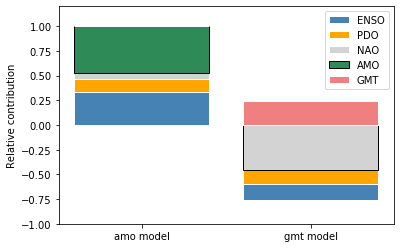

In [44]:
coeff_info_amo['sig_color'] = np.where(coeff_info_amo['p-value']> 0.1, 'white', 'black')
coeff_info_gmt['sig_color'] = np.where(coeff_info_gmt['p-value']> 0.1, 'white', 'black')

bot_amo = coeff_info_amo.loc[coeff_info_amo['norm_contribution']<0, 'norm_contribution' ].sum()
bot_gmt = coeff_info_gmt.loc[coeff_info_gmt['norm_contribution']<0, 'norm_contribution' ].sum()


# define bar height
enso = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("ENSO"), 'norm_contribution' ].sum(),
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("ENSO"), 'norm_contribution' ].sum()]
pdo = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("PDO"), 'norm_contribution' ].sum(),
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("PDO"), 'norm_contribution' ].sum()]
nao = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("NAO"), 'norm_contribution' ].sum(),
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("NAO"), 'norm_contribution' ].sum()]
amo = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("AMO"), 'norm_contribution' ].sum(),
        0]
gmt = [0,
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("GMT"), 'norm_contribution' ].sum()]
# define edgecolor in dependence of significance

enso_sig = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("ENSO"), 'sig_color' ].sum(),
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("ENSO"), 'sig_color' ].sum()]
pdo_sig = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("PDO"), 'sig_color' ].sum(),
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("PDO"), 'sig_color' ].sum()]
nao_sig = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("NAO"), 'sig_color' ].sum(),
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("NAO"), 'sig_color' ].sum()]
amo_sig = [coeff_info_amo.loc[coeff_info_amo['Predictor'].str.contains("AMO"), 'sig_color' ].sum(),
        'white']
gmt_sig = ['white',
        coeff_info_gmt.loc[coeff_info_gmt['Predictor'].str.contains("GMT"), 'sig_color' ].sum()]

# define bottoms
pdo_bot = [bot_amo+ np.abs(enso[0]), bot_gmt+np.abs(enso[1])]
nao_bot = [pdo_bot[0] + np.abs(pdo[0]), pdo_bot[1] + np.abs(pdo[1])]
amo_bot = [nao_bot[0] + np.abs(nao[0]), nao_bot[1] + np.abs(nao[1])]
gmt_bot = [amo_bot[0] + np.abs(amo[0]), amo_bot[1] + np.abs(amo[1])]

# plot
plt.bar([1,2], np.abs(enso), bottom = [bot_amo, bot_gmt], color = 'steelblue',
        label = 'ENSO', edgecolor=enso_sig)
plt.bar([1,2], np.abs(pdo), bottom = pdo_bot , color = 'orange', label = 'PDO', edgecolor=pdo_sig)
plt.bar([1,2], np.abs(nao), bottom = nao_bot , color = 'lightgray', label = 'NAO', edgecolor=nao_sig)
plt.bar([1,2], np.abs(amo), bottom = amo_bot , color = 'seagreen', label = 'AMO', edgecolor=amo_sig)
plt.bar([1,2], np.abs(gmt), bottom = gmt_bot , color = 'lightcoral', label = 'GMT', edgecolor=gmt_sig)

plt.legend()
plt.ylim([-1,1.2])
plt.ylabel('Relative contribution')
plt.xticks([1,2],['amo model', 'gmt model'])

In this example, AMO is a significant predictor, while GMT remains insignificant. However, the differences in the performance indicators do not permit to rule out contributions of any of the two drivers.